In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

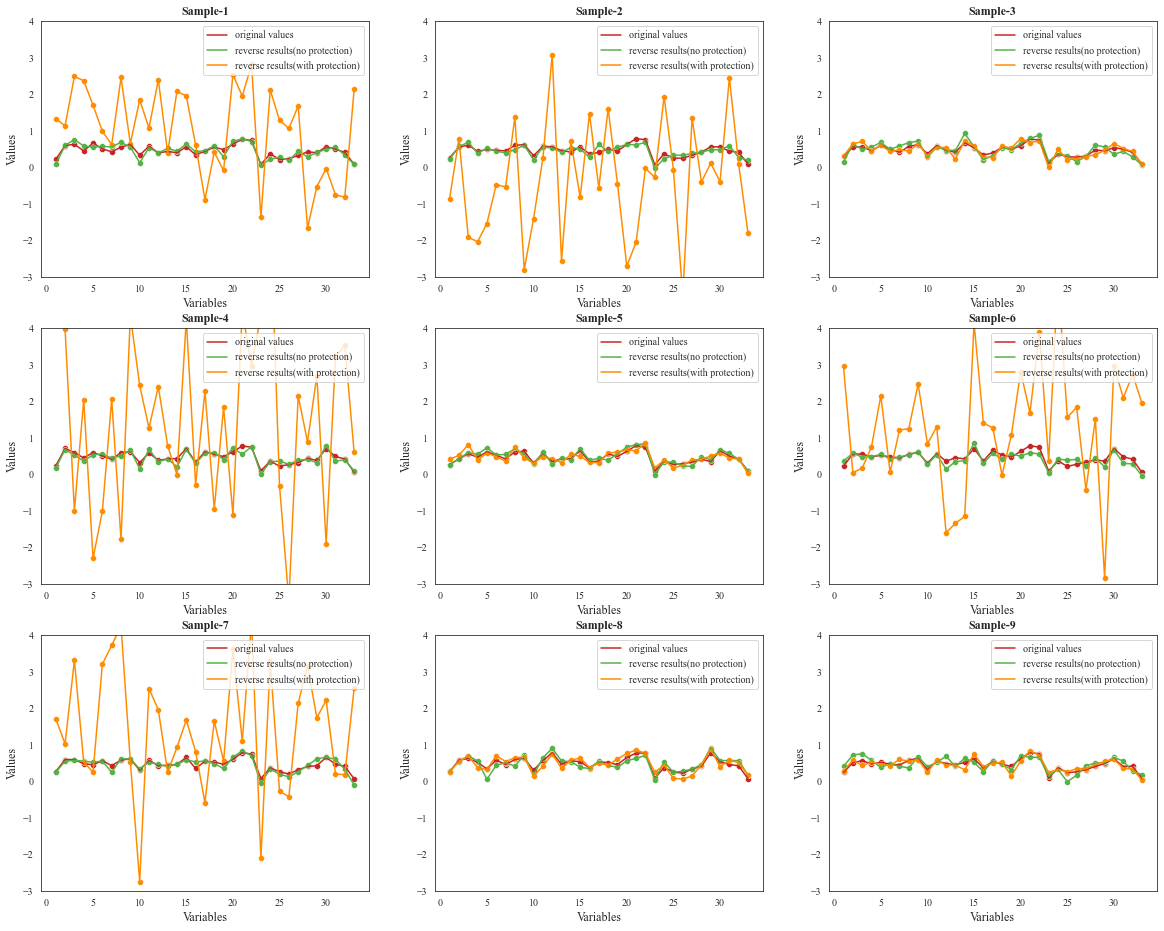

In [2]:
# dlg 折线图
train_data = np.load('../data/TE/regression/train_data.npy')
_list=[10, 77, 123, 178, 234, 310, 366, 417, 488]
df = pd.DataFrame(index=range(9), columns=["mse1", "mse2"])
sns.set_style('white')
fig, ax = plt.subplots(3, 3, figsize=(20, 16))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
ax = ax.ravel()
for i, c in enumerate(_list):
    original = train_data[c, :]
    reverse_result = np.load('./results/dlg/reverse_result/' + str(c) + '.npy')+0.1*np.random.randn(33)
    reverse_result_protected = np.load('./results/dlg/reverse_result_protected/' + str(c) + '.npy')+0.1*np.random.randn(33)

    df.loc[i, "mse1"] = mean_squared_error(original, reverse_result)
    df.loc[i, "mse2"] = mean_squared_error(original, reverse_result_protected)

    sns.scatterplot(x=range(1, 34), y=original, color="#c82423", markers=',', ax=ax[i])
    sns.scatterplot(x=range(1, 34), y=reverse_result, color='#54B345', markers=',', ax=ax[i])
    sns.scatterplot(x=range(1, 34), y=reverse_result_protected, color='darkorange', markers=',', ax=ax[i])
    
    sns.lineplot(x=range(1, 34), y=original, color="#c82423", ax=ax[i])
    sns.lineplot(x=range(1, 34), y=reverse_result, color='#54B345', ax=ax[i])
    sns.lineplot(x=range(1, 34), y=reverse_result_protected, color='darkorange', ax=ax[i])
    
    ax[i].set_ylim(-3, 4)
    ax[i].set_xlabel("Variables", fontsize=12)
    ax[i].set_ylabel("Values", fontsize=12)
    ax[i].set_title("Sample-"+str(i+1), fontsize=12, weight='bold')
    ax[i].legend(labels=["original values", "reverse results(no protection)", "reverse results(with protection)"], loc="upper right", fontsize=10)
    #plt.savefig("./results/dlg/回归折线.svg", dpi=500, bbox_inches='tight')
    plt.savefig("../论文图片/dlg回归折线图.pdf", dpi=600, bbox_inches='tight')

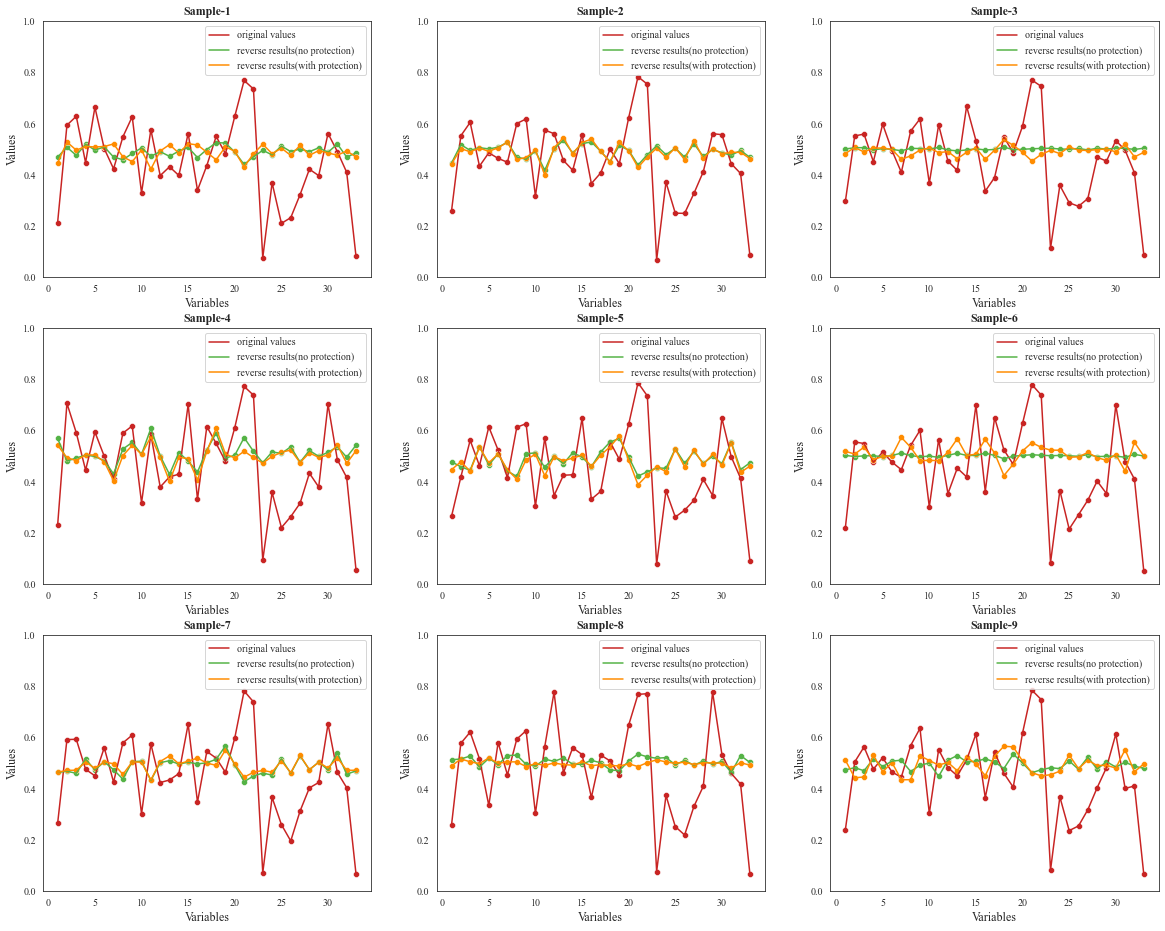

In [3]:
# mia折线图
train_data = np.load('../data/TE/regression/train_data.npy')
_list=[10, 77, 123, 178, 234, 310, 366, 417, 488]
df = pd.DataFrame(index=range(9), columns=["mse1", "mse2"])
sns.set_style('white')
fig, ax = plt.subplots(3, 3, figsize=(20, 16))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
ax = ax.ravel()
for i, c in enumerate(_list):
    original = train_data[c, :]
    reverse_result = np.load('./results/mia/reverse_result/' + str(c) + '.npy')
    reverse_result_protected = np.load('./results/mia/reverse_result_protected/' + str(c) + '.npy')

    df.loc[i, "mse1"] = mean_squared_error(original, reverse_result)
    df.loc[i, "mse2"] = mean_squared_error(original, reverse_result_protected)

    sns.scatterplot(x=range(1, 34), y=original, color="#c82423", markers=',', ax=ax[i])
    sns.scatterplot(x=range(1, 34), y=reverse_result, color='#54B345', markers=',', ax=ax[i])
    sns.scatterplot(x=range(1, 34), y=reverse_result_protected, color='darkorange', markers=',', ax=ax[i])
    
    sns.lineplot(x=range(1, 34), y=original, color="#c82423", ax=ax[i])
    sns.lineplot(x=range(1, 34), y=reverse_result, color='#54B345', ax=ax[i])
    sns.lineplot(x=range(1, 34), y=reverse_result_protected, color='darkorange', ax=ax[i])
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel("Variables", fontsize=12)
    ax[i].set_ylabel("Values", fontsize=12)
    ax[i].set_title("Sample-"+str(i+1), fontsize=12, weight='bold')
    ax[i].legend(labels=["original values", "reverse results(no protection)", "reverse results(with protection)"], loc="upper right", fontsize=10)
    #plt.savefig("./results/dlg/回归折线.svg", dpi=500, bbox_inches='tight')
    plt.savefig("../论文图片/mia回归折线图.pdf", dpi=600, bbox_inches='tight')

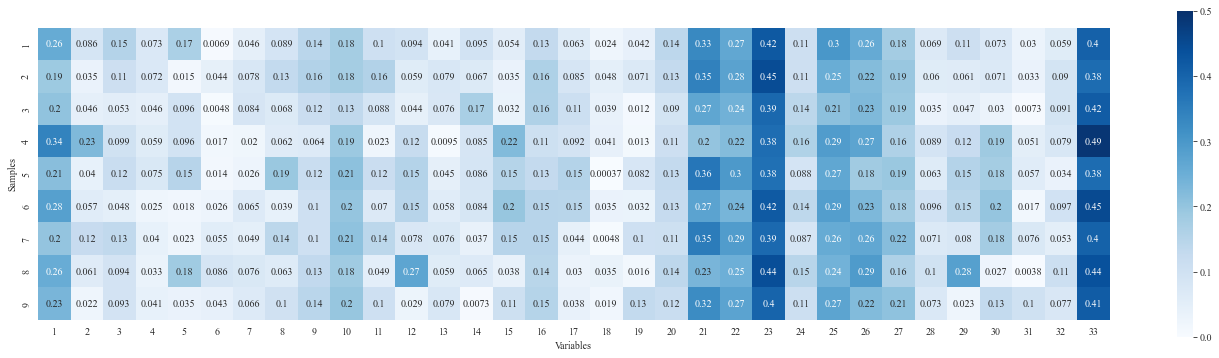

In [30]:
# mia heatmap
train_data = np.load('../data/TE/regression/train_data.npy')
_list=[10, 77, 123, 178, 234, 310, 366, 417, 488]
df = pd.DataFrame(index=range(1, 10), columns=range(1, 34), dtype=np.float32)
for i, c in enumerate(_list):
    original = train_data[c, :]
    reverse_result = np.load('./results/mia/reverse_result/' + str(c) + '.npy')
    reverse_result_protected = np.load('./results/mia/reverse_result_protected/' + str(c) + '.npy')
    for j in range(33):
        df.loc[i+1, j+1] = np.abs(original[j]-reverse_result[j])
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.figure(figsize=(24, 6))
sns.heatmap(df, vmax=0.5, vmin=0, cmap="Blues", annot=True, square=True)
plt.xlabel("Variables")
plt.ylabel("Samples")
#plt.savefig("./results/mia/回归热力图.svg", dpi=600, bbox_inches='tight') 
plt.savefig("../论文图片/mia回归热力图.pdf", dpi=600, bbox_inches='tight')